In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import the dataset and define the features
df = pd.read_csv('train_new_s.csv')
# drop the animal names since this is not a good feature to split the data on
#df = df.drop('animal_name',axis=1)

In [160]:
df

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Upc_new,DepartmentDescription_new,FinelineNumber_new
0,8,9,5,4.011000e+03,1,PRODUCE,5501.0,22,57,3368
1,9,23,5,4.011000e+03,1,PRODUCE,5501.0,22,57,3368
2,39,26,5,4.011000e+03,1,PRODUCE,5501.0,22,57,3368
3,15,49,5,4.011000e+03,1,PRODUCE,5501.0,22,57,3368
4,37,86,5,4.011000e+03,1,PRODUCE,5501.0,22,57,3368
...,...,...,...,...,...,...,...,...,...,...
245680,40,190015,0,2.800047e+09,1,GROCERY DRY GOODS,2992.0,13031,24,1932
245681,39,190480,0,2.800033e+09,1,GROCERY DRY GOODS,2992.0,13013,24,1932
245682,37,191111,0,2.800047e+09,1,GROCERY DRY GOODS,2992.0,13029,24,1932
245683,24,191177,0,3.008783e+10,1,GROCERY DRY GOODS,2992.0,56012,24,1932


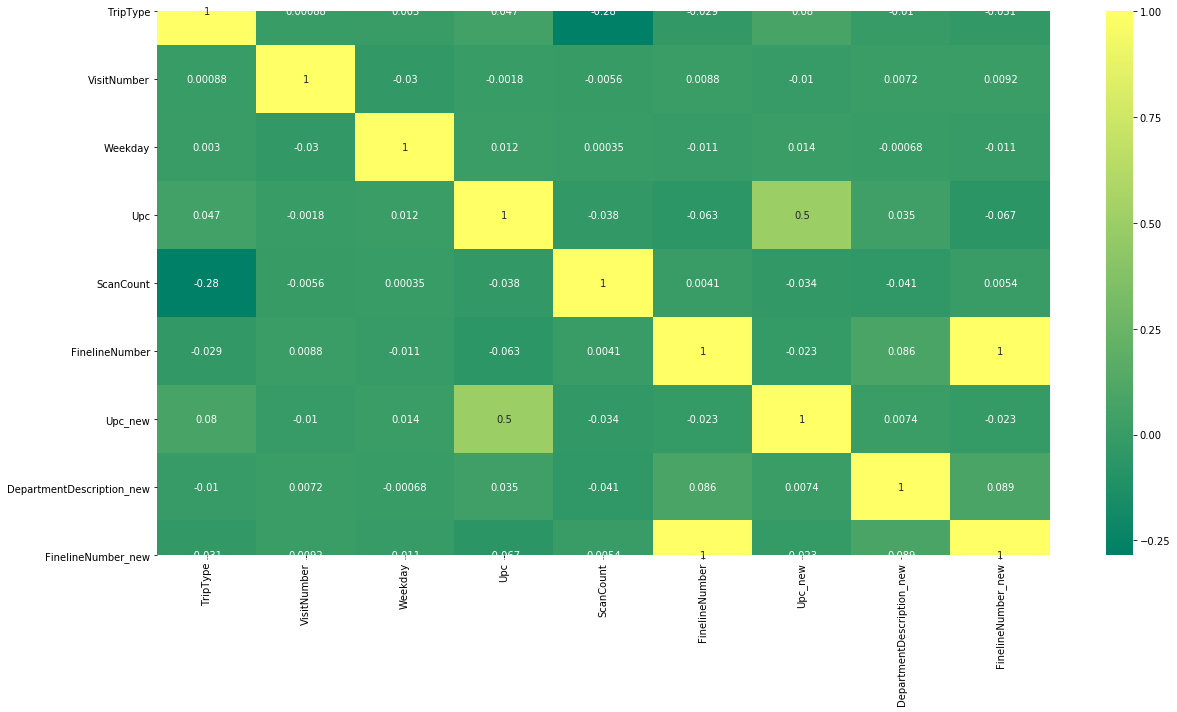

In [5]:
 import seaborn as sns
# correlations using heat map plot
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='summer')
plt.show()

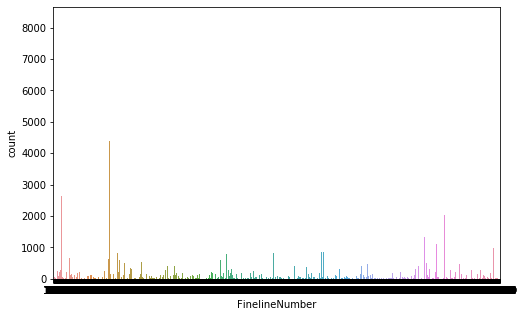

In [7]:
 plt.figure(figsize=(8,5))
# count rows of each classes
sns.countplot(x="product_id", data=df)

In [196]:
counts=df['VisitNumber'].value_counts()

In [197]:
counts

105804    48
178154    48
88395     47
25479     47
80318     45
          ..
175850     1
167662     1
149239     1
102158     1
10245      1
Name: VisitNumber, Length: 64547, dtype: int64

In [198]:
counts.iloc[5000]

10

In [199]:
counts_100=counts.iloc[0:5000]

In [200]:
list=counts_100.index.tolist()

In [141]:
df.loc[df['order_products__prior']==5501]

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Upc_new,DepartmentDescription_new,FinelineNumber_new
195,115,5,4011.0,1,PRODUCE,5501.0,21,56,3371
211,118,5,4011.0,1,PRODUCE,5501.0,21,56,3371
288,142,5,4011.0,2,PRODUCE,5501.0,21,56,3371
313,151,5,4011.0,1,PRODUCE,5501.0,21,56,3371
319,158,5,4011.0,1,PRODUCE,5501.0,21,56,3371
...,...,...,...,...,...,...,...,...,...
649337,191295,0,4011.0,1,PRODUCE,5501.0,21,56,3371
649379,191302,0,4011.0,1,PRODUCE,5501.0,21,56,3371
649403,191306,0,4011.0,1,PRODUCE,5501.0,21,56,3371
649583,191327,0,4011.0,1,PRODUCE,5501.0,21,56,3371


In [201]:
df2 = pd.DataFrame()
for i in list: 
    df2=df2.append(df.loc[df['VisitNumber']==i], ignore_index=True)

In [203]:
df2

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Upc_new,DepartmentDescription_new,FinelineNumber_new
0,40,105804,0,4.011000e+03,1,PRODUCE,5501.0,22,57,3368
1,40,105804,0,7.874235e+09,1,DAIRY,1508.0,48972,16,1089
2,40,105804,0,2.500002e+09,1,DAIRY,1407.0,11247,16,1031
3,40,105804,0,2.500005e+09,1,DAIRY,1407.0,11268,16,1031
4,40,105804,0,3.760049e+09,2,GROCERY DRY GOODS,100.0,19682,24,95
...,...,...,...,...,...,...,...,...,...,...
77528,40,137247,6,3.663203e+09,1,DAIRY,1443.0,18155,16,1062
77529,40,137247,6,9.800895e+08,2,GROCERY DRY GOODS,2500.0,759,24,1639
77530,40,137247,6,3.338311e+09,1,PRODUCE,109.0,16108,57,104
77531,40,137247,6,7.874203e+09,2,INFANT CONSUMABLE HARDLINES,3163.0,47302,34,2065


In [204]:
df2.to_csv("./train_new_ss.csv",index=False) 

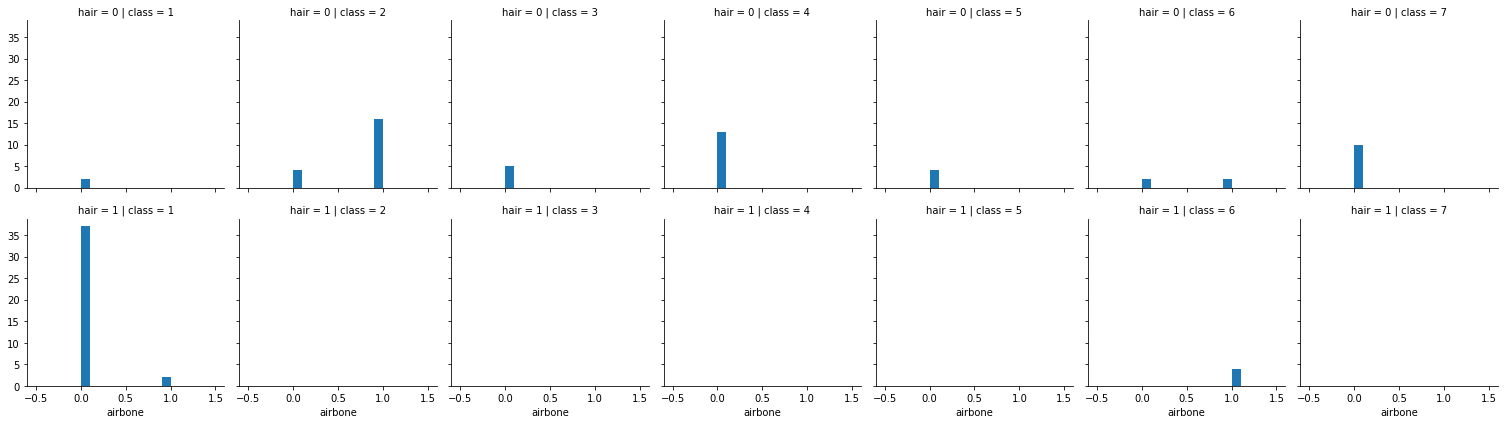

In [13]:
g = sns.FacetGrid(df, col="class", row="hair")
g = g.map(plt.hist, "airbone")
g

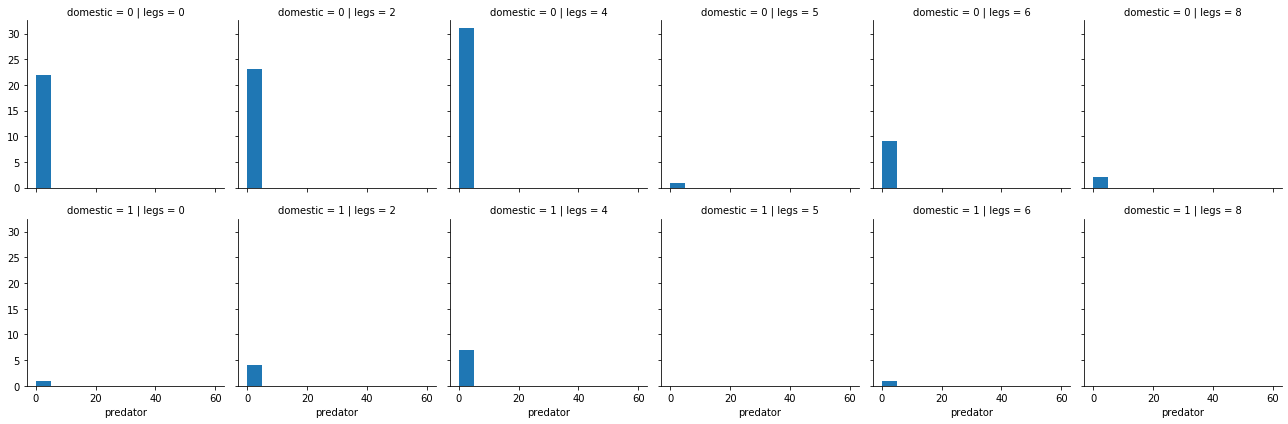

In [15]:
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(df, col="legs", row='domestic')
g = g.map(plt.hist, "predator", bins=bins)
g